<a href="https://colab.research.google.com/github/ashirmuhd/DSA/blob/main/case_study_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
data = pd.read_csv("/content/car_age_price (1).csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [9]:
data.isna().sum()

,0
Year,0
Price,0


In [10]:
data.columns.duplicated().sum()

np.int64(0)

<Axes: ylabel='Year'>

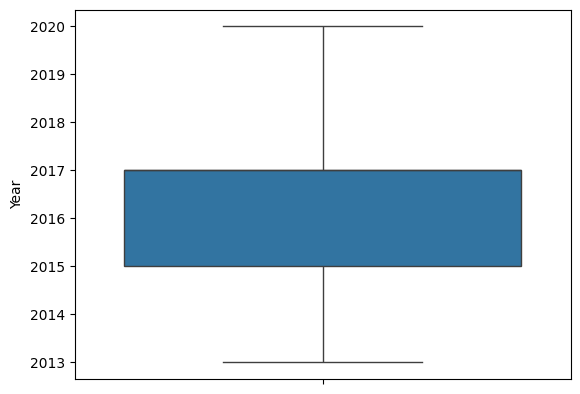

In [14]:
sns.boxplot(data['Year'])

<Axes: ylabel='Price'>

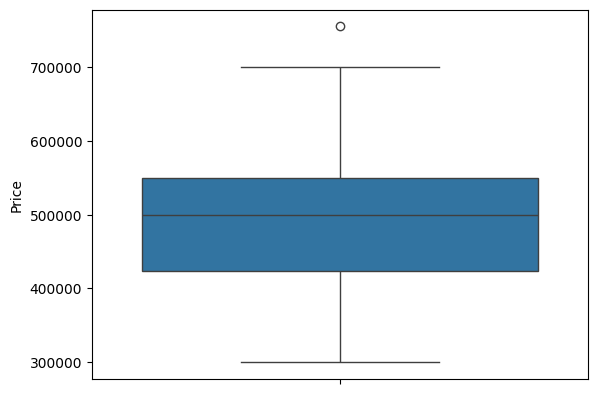

In [15]:
sns.boxplot(data['Price'])

<Axes: ylabel='Price'>

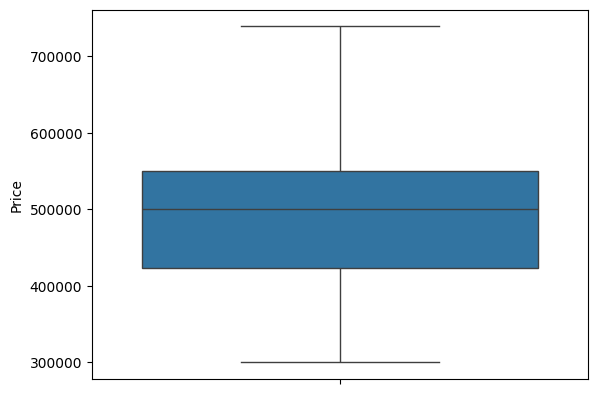

In [16]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

IQR = q3-q1
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
data['Price'] = data['Price'].clip(lower_limit,upper_limit)
sns.boxplot(data['Price'])


In [17]:
X = data[['Year']]
y = data['Price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)


In [20]:
lasso_model = Lasso(alpha=1000)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

In [21]:
price_2022_linear = linear_model.predict([[2022]])[0]
price_2022_lasso = lasso_model.predict([[2022]])[0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [25]:
print(" MODEL PERFORMANCE COMPARISON\n")
print(f"Linear Regression → MSE: {linear_mse:.2f}, R²: {linear_r2:.4f}")
print(f"Lasso Regression  → MSE: {lasso_mse:.2f}, R²: {lasso_r2:.4f}")

print("\n💰 Predicted Price for 2022 Hyundai Grand i10:")
print(f"Linear Regression: ₹{price_2022_linear:,.0f}")
print(f"Lasso Regression : ₹{price_2022_lasso:,.0f}")

 MODEL PERFORMANCE COMPARISON

Linear Regression → MSE: 4296980485.32, R²: 0.3720
Lasso Regression  → MSE: 4251669392.69, R²: 0.3786

💰 Predicted Price for 2022 Hyundai Grand i10:
Linear Regression: ₹742,466
Lasso Regression : ₹740,225
